# Chapter06 데이터 전처리
데이터 과학을 위한 파이썬 머신러닝

- <a href="#06.1데이터전처리기초">06.1 데이터 전처리 기초</a>
- <a href="#06.2데이터전처리전략">06.2 데이터 전처리 전략</a>
- <a href="#06.3데이터전처리실습">06.3 데이터 전처리 실습</a>

------------------

## <a name="06.1데이터전처리기초">06.1 데이터 전처리 기초</a>

### 1. 데이터 전처리의 개념
- 머신러닝 모델에 훈련 데이터를 입력하기 전에 데이터를 가공하는 단계
- 데이터의 결측치 및 이상치를 확인하거나 제거하고 불일치되는 부분을 일관성 있는 데이터의 형태로 전환하는 과정
- 넘파이나 판다스 같은 머신러닝의 핵심 도구, 맷플롯립과 시본 같은 데이터 시각화 도구를 활용하여 실제 데이터를 정리하는 과정
- 훈련 데이터(train data)와 테스트 데이터(test data)가 모두 같은 구조를 갖는 피쳐(feature)로 만드는 과정

 - - Data preparation -> Feature engineering -> Model training -> Model evaluation -> Model deployment -> Model serving -> Performance monitoring

### 데이터의 분류
#### 수치형(Numerical) 데이터

| 분류 |연속형 데이터(continuous data) | 이산형 데이터(discrete data) |
|:------|:---|:---|
| 설명 | 값이 끊어지지 않고 계속 연결되는 종류의 데이터로<br>실수와 관련된 값 | 연속적 값이 아니라 분리해서 표현하는 데이터로<br>일종의 라벨로 구분 가능 |
| 데이터 예 | 온도, 자동차의 속도|우편번호(숫자로 표현), 성별(텍스트로 표현)|
| |평균, 분산 등 통계적 기법 적용 가능|텍스트 형태의 값도 숫자 형태로 바꾸어 수식의 $x_i$에 할당|



#### 범주형(Categorical) 데이터
| 분류 |명목형 데이터(nominal data) | 순서형 데이터(ordinal data) |
|:------|:---|:---|
| 설명 | 숫자로 바꾸어도 그 값이 크고 작음을 <br>나타내는 것이 아니라 단순히 범주를 표시한 값 | 범주의 순서가 상대 비교가 가능한 값 |
| 데이터 예 | 혈액형 A,B,O,AB <br> 성별 남, 여| 비만도 저체중, 정상, 과체중, 비만, 고도비만<br>학점  A, B, C, D, F|
| |수치 맵핑 변환, [0, 1]<br> 더미 맵핑 변환|수치 맵핑 변환, [0, 1, 2] <br>범위 차이가 적게 나도록|


### 2. 데이터의 품질 문제 

#### 2.1 데이터 분포의 지나친 차이

- 데이터가 연속형 값인데 최댓값과 최솟값 차이가 피쳐보다 더 많이 나는 경우
- 학습에 영향을 줄 수 있기 때문에 데이터의 스케일(scale)을 맞춰줌
 - - Min-Max Scaling 공식 : $x = \frac{x - x_{min}}{x_{max} - x_{min}}$
- 데이터의 최댓값과 최솟값을 0에서 1 사이 값으로 바꾸거나 표준 정규분포 형태로 나타내는 등

| Normalization | Standardization | 
|----- |:--- |
| 스케일링 시 최대, 최소값이 사용 | 스케일링 시 평균과 표준편차가 사용 |
| 피처의 크기가 다를 때 사용  |  평균0, 표준편차1인 것을 확인하고 싶을 때 | 
| [0,1]/[-1,1] 사이의 값으로 스케일링 | 특정 범위로 제한되지 않음  | 
| 분포에 대해 모를 때 유용 | 피처가 정규분포(가우시안 분포)인 경우 유용| 
| MinMaxScaler, Nomalizer  | StandardScaler, RobustScaler| 


- 확률변수가 표준정규분포를 따를 때, 이를 로 표시한다
$f(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2} z^2}, -\infty < z < +\infty$
- 0 주위에 표준편차 1의 값으로 배치되도록 피처를 표준화하는 것은 다른 단위를 가진 측정값을 비교할 때 중요할 뿐만 아니라 많은 기계 학습 알고리즘의 일반적인 요구 사항임 (로지스틱 회귀분석, SVM, 퍼셉트론, 신경망 등에 자주 사용되는 최적화된 알고리즘)
- 정규화와 표준화 모두 경사 하강 알고리즘을 더 빠르게 동작할 수 있도록 도와주는 것임

#### 2.2 기수형 데이터와 서수형 데이터

- 기수형(cardinal number) : 세는 수(how many),  '하나, 둘, 셋' 또는 '한 개, 두 개, 세 개'와 같이 개수를 셀 때 쓰는 수 
- 서수형 : 순서를 나타내는 수(position), '첫째, 둘째, 셋째' 나 '제일, 제이, 제삼' 또는 '일, 이, 삼' 과 같이 번호를 붙이는 수
- 기수형 데이터와 서수형 데이터는 일반적으로 숫자로 표현되지 않음
- 컴퓨터가 이해할 수 있는 숫자 형태의 정보로 변형

#### 2.3 결측치

- 결측치(missing data) : 실제로 존재하지만 데이터베이스 등에 기록되지 않는 데이터
- 해당 데이터를 빼고 모델을 돌릴 수 없기 때문에 결측치 처리 전략을 세워 데이터를 채워 넣음

#### 2.4 이상치
이상치(outlier) : 극단적으로 크거나 작은 값 제거

- 단순히 데이터 분포의 차이와는 다름
- 데이터 오기입이나 특이 현상 때문에 나타남

------

## <a name="06.2데이터전처리전략">06.2 데이터 전처리 전략</a>

In [99]:
import pandas as pd
import numpy as np

raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
            'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
            'age': [42, np.nan, 36, 24, 73],
            'sex': ['m', np.nan, 'f', 'm', 'f'],
            'preTestScore': [4, np.nan, np.nan, 2, 3],
            'postTestScore': [25, np.nan, np.nan, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.00,25.00
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.00,f,NaN,NaN
3,Jake,Milner,24.00,m,2.00,62.00
4,Amy,Cooze,73.00,f,3.00,70.00


### 1. 결측치 처리하기 : 드롭과채우기
- 데이터가 없으면 해당 행이나 열을 삭제
- 평균값, 최빈값, 중간값 등으로 데이터를 채움

#### 결측치 확인
- pandas 함수 사용: isnull() (수치화)
- missingno 패키지: 결측 데이터 검색 (시각화)
- sklearn.impute 패키지: 결측 데이터 대체

In [100]:
df.isnull()

,first_name,last_name,age,sex,preTestScore,postTestScore
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,True,True
3,False,False,False,False,False,False
4,False,False,False,False,False,False


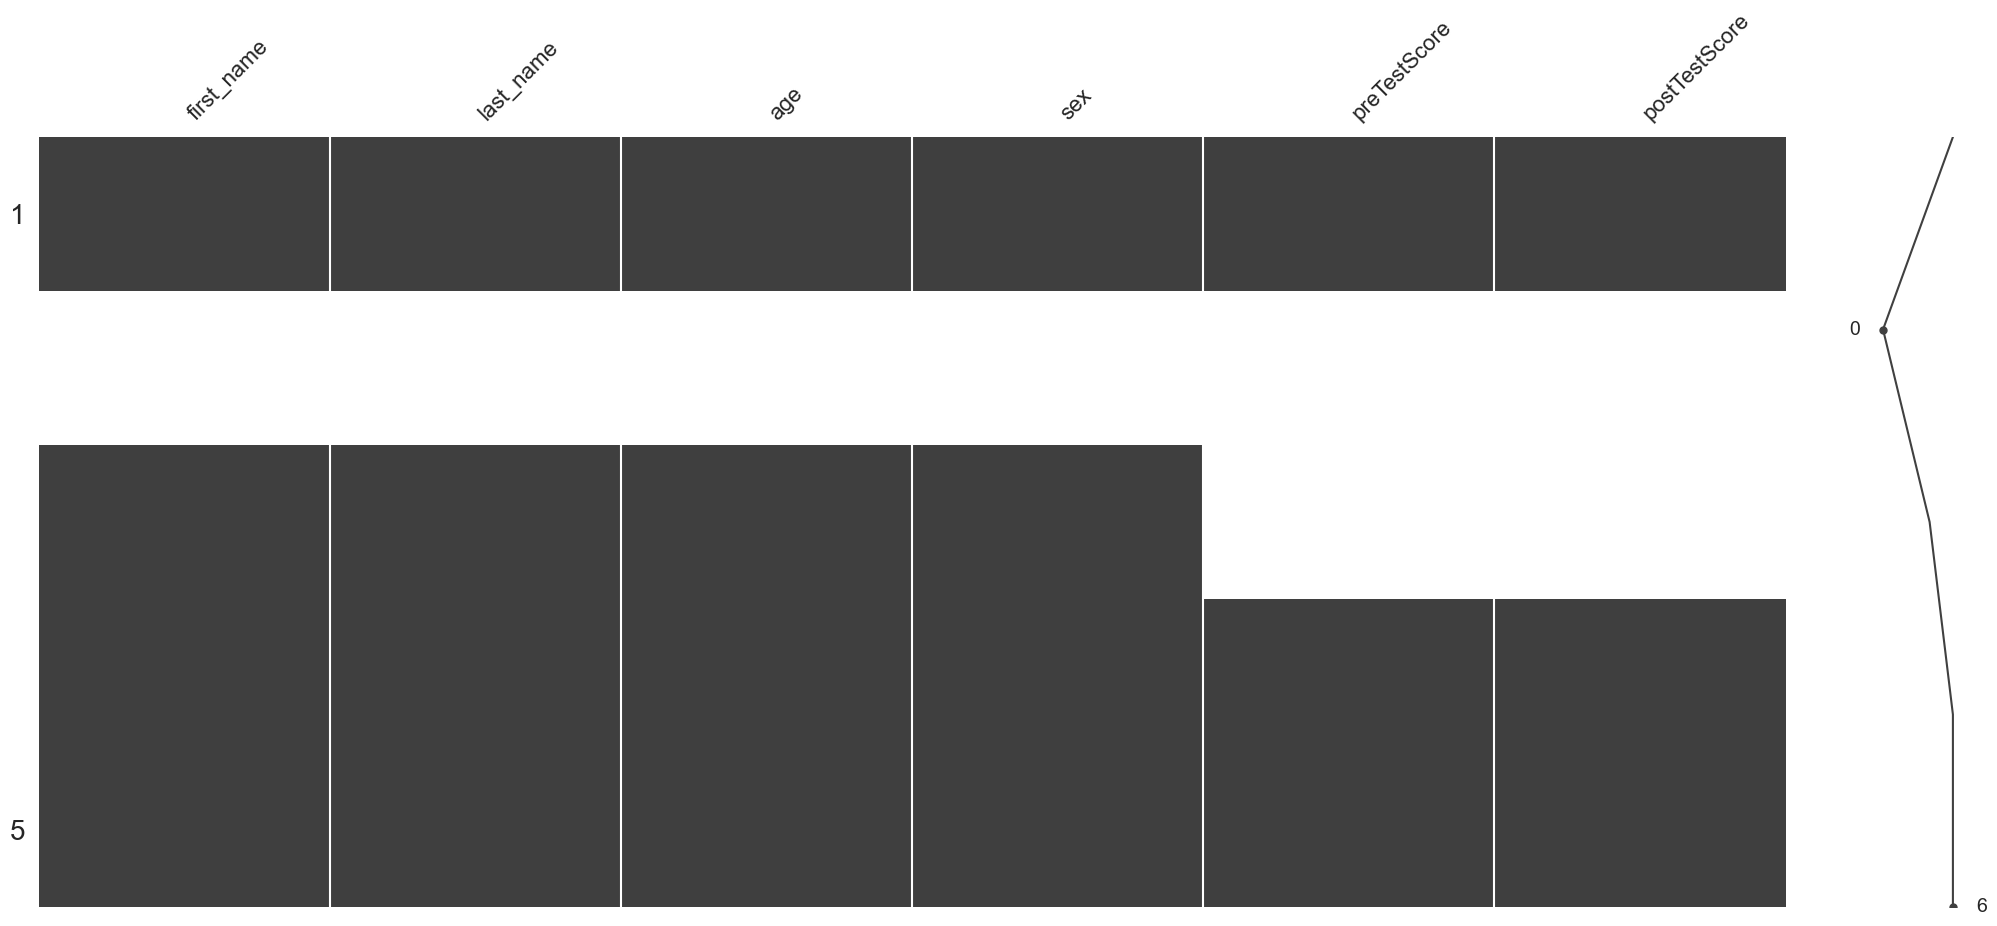

In [101]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   first_name     4 non-null      object 
 1   last_name      4 non-null      object 
 2   age            4 non-null      float64
 3   sex            4 non-null      object 
 4   preTestScore   3 non-null      float64
 5   postTestScore  3 non-null      float64
dtypes: float64(3), object(3)
memory usage: 368.0+ bytes


#### 드롭
- 드롭(drop) : 결측치가 나온 열이나 행을 삭제
- dropna 사용하여 NaN이 있는 모든 데이터의 행을 없앰

In [103]:
df.dropna()
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.00,25.00
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.00,f,NaN,NaN
3,Jake,Milner,24.00,m,2.00,62.00
4,Amy,Cooze,73.00,f,3.00,70.00


In [104]:
# 드롭된 결과를 변수에 지정해서 사용
df_no_missing = df.dropna()
df_no_missing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.00,25.00
3,Jake,Milner,24.00,m,2.00,62.00
4,Amy,Cooze,73.00,f,3.00,70.00


In [105]:
df.dropna(inplace=True)
df
#결측치 drop 적용에는 두 가지 방법이 있다!

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.00,25.00
3,Jake,Milner,24.00,m,2.00,62.00
4,Amy,Cooze,73.00,f,3.00,70.00


In [106]:
# 매개변수 how로 조건에 따라 결측치를 지움
# - ‘all’은 행에 있는 모든 값이 NaN일 때 해당 행을 삭제
# - ‘any’는 하나의 NaN만 있어도 삭제
# - dropna의 기본 설정은 ‘any’라서 모든 결측치를 지움
df_cleaned = df.dropna(how='all')
df_cleaned = df.dropna(how='any')

df_cleaned

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.00,25.00
3,Jake,Milner,24.00,m,2.00,62.00
4,Amy,Cooze,73.00,f,3.00,70.00


In [107]:
# 열 값이 모두 NaN일 경우에는 축(axis)을 추가하여 삭제
df['location'] = np.nan
df.dropna(axis=1, how='all')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.00,25.00
3,Jake,Milner,24.00,m,2.00,62.00
4,Amy,Cooze,73.00,f,3.00,70.00


In [108]:
# 매개변수 thresh 데이터의 개수를 기준으로 삭제
# - thresh=1 지정하면 데이터가 한 개라도 존재하는 행은 남김
# - thresh=5 지정하면 데이터가 다섯 개 이상 있어야 남김
df.dropna(axis=0, thresh=1)
# df.dropna(thresh=5)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.00,m,4.00,25.00,NaN
3,Jake,Milner,24.00,m,2.00,62.00,NaN
4,Amy,Cooze,73.00,f,3.00,70.00,NaN


#### 채우기
- 채우기(fill) : 비어있는 값을 채움
- 일반적으로  드롭한 후에 남은 값들을 채우기 처리
- 평균, 최빈값 등 데이터의 분포를 고려해서 채움
- 함수 fillna 사용

In [109]:
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df.fillna(0)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.00,25.00
1,0,0,0.00,0,0.00,0.00
2,Tina,Ali,36.00,f,0.00,0.00
3,Jake,Milner,24.00,m,2.00,62.00
4,Amy,Cooze,73.00,f,3.00,70.00


In [110]:
# preTestScore 결측치 채우기
# 빈 값에 평균값을 채우려면 열 단위의 평균값을 계산하여 해당 열에만 값을 채움

# df.preTestScore.fillna(df.preTestScore.mean, inplace=True)

In [111]:
# 열별 분포를 고려하여 채울 수 있음
# - groupby 함수로 각 인덱스의 성별에 따라 빈칸을 채움
df.groupby("sex")["postTestScore"].transform("mean")

0   43.50
1     NaN
2   70.00
3   43.50
4   70.00
Name: postTestScore, dtype: float64

In [112]:
# fillna 함수 안에 transform을 사용하여 인덱스를 기반으로 채울 수 있음
df["postTestScore"].fillna(
    df.groupby("sex")["postTestScore"].transform("mean"), inplace=True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.00,m,4.00,25.00
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.00,f,NaN,70.00
3,Jake,Milner,24.00,m,2.00,62.00
4,Amy,Cooze,73.00,f,3.00,70.00


### 2. 범주형 데이터 처리하기 : 원핫인코딩
- 원핫인코딩(one-hot encoding) : 범주형 데이터의 개수만큼 가변수(dummy variable)를 생성하여 존재 유무를 1 또는 0으로 표현
- pandas : get_dummies()
- scikit-learn : LabelEncoder, OneHotEncoder 

In [113]:
edges = pd.DataFrame({'source': [0, 1, 2], 'target': [2, 2, 3],
                      'weight': [3, 4, 5], 'color': ['red', 'blue', 'blue']})
edges

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [114]:
# 데이터의 유형 확인  (범주형 데이터:object 확인)

edges.dtypes

source     int64
target     int64
weight     int64
color     object
dtype: object

In [115]:
# get_dummies를 적용하여 범주형 데이터 color에 가변수 추가

pd.get_dummies(edges)

,source,target,weight,color_blue,color_red
0,0,2,3,False,True
1,1,2,4,True,False
2,2,3,5,True,False


In [116]:
# 해당 열의 color 값만 따로 추출해서 적용
pd.get_dummies(edges["color"])
pd.get_dummies(edges[["color"]])

,color_blue,color_red
0,False,True
1,True,False
2,True,False


In [117]:
# 필요에 따라 정수형을 객체로 변경해서 처리
# - weight는 숫자로 되어 있지만 기수형 데이터
# - 데이터를 M, L, XL로 변경하여 원핫인코딩을 적용
weight_dict = {3:"M", 4:"L", 5:"XL"}
edges["weight_sign"] = edges["weight"].map(weight_dict)
weight_sign = pd.get_dummies(edges["weight_sign"])
weight_sign

,L,M,XL
0,False,True,False
1,True,False,False
2,False,False,True


In [118]:
# 데이터를 원핫인코딩 형태로 변경한 후 필요에 따라 병합이나 연결로 두 가지의 데이터를 합침
pd.concat([edges, weight_sign], axis=1)

,source,target,weight,color,weight_sign,L,M,XL
0,0,2,3,red,M,False,True,False
1,1,2,4,blue,L,True,False,False
2,2,3,5,blue,XL,False,False,True


### 3. 범주형 데이터로 변환하여 처리하기 : 바인딩
- 바인딩(binding) : 연속형 데이터를 범주형 데이터로 변환 (좀 더 나은 성능을 위해)

In [119]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
            'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [120]:
# postTestScore에 대한 학점을 측정하는 코드를 작성
# - 데이터 범위를 구분 : 0~25, 25~50, 50~75, 75~100으로 구분
# - 함수 cut 사용 : cut 함수로 나눌 시리즈 객체와 구간, 구간의 이름을 넣어주면 해당 값을 바인딩하여 표시해줌
bins = [0, 25, 50, 75, 100] # bins 정의(0-25, 25-50, 60-75, 75-100)
group_names = ['Low', 'Okay', 'Good', 'Great']
categories = pd.cut(df.postTestScore, bins, labels=group_names)
categories

0       Low
1     Great
2      Good
3      Good
4      Good
5       Low
6     Great
7      Good
8      Good
9      Good
10     Good
11     Good
Name: postTestScore, dtype: category
Categories (4, object): ['Low' < 'Okay' < 'Good' < 'Great']

In [121]:
df['categories'] = categories
df

,regiment,company,name,preTestScore,postTestScore,categories
0,Nighthawks,1st,Miller,4,25,Low
1,Nighthawks,1st,Jacobson,24,94,Great
2,Nighthawks,2nd,Ali,31,57,Good
3,Nighthawks,2nd,Milner,2,62,Good
4,Dragoons,1st,Cooze,3,70,Good
5,Dragoons,1st,Jacon,4,25,Low
6,Dragoons,2nd,Ryaner,24,94,Great
7,Dragoons,2nd,Sone,31,57,Good
8,Scouts,1st,Sloan,2,62,Good
9,Scouts,1st,Piger,3,70,Good


### 4. 데이터의 크기 맞추기 : 피쳐 스케일링
- 스케일링(scaling) : 데이터 간 범위를 맞춤
- x1과 x2의 변수 범위가 다를 때 하나의 변수 범위로 통일시켜 처리
- **최솟값-최댓값 정규화(min-max normalization)** : 최솟값과 최댓값을 기준으로 0에서 1, 또는 0에서 지정 값까지로 값의 크기를 변화시킴
- **z-스코어 정규화(z-score normalization)** : 기존 값을 표준정규분포값으로 변환하여 처리

In [122]:
df = pd.DataFrame(
    {'A':[14.00,90.20,90.95,96.27,91.21],
     'B':[103.02,107.26,110.35,114.23,114.68],
     'C':['big','small','big','small','small']})

df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [123]:
# 스케일링할 때는 브로드캐스팅 개념으로 스칼라 값 (평균값, 최댓값, 최솟값)과 벡터(열) 값 간 연산
df["A"] - df["A"].min()

0    0.00
1   76.20
2   76.95
3   82.27
4   77.21
Name: A, dtype: float64

#### 최솟값-최댓값 정규화(min-max normalization)

In [124]:
df['A_minmax_scale'] = (df.A - df.A.min()) / (df.A.max() - df.A.min())
df

,A,B,C,A_minmax_scale
0,14.00,103.02,big,0.00
1,90.20,107.26,small,0.93
2,90.95,110.35,big,0.94
3,96.27,114.23,small,1.00
4,91.21,114.68,small,0.94


#### z-스코어 정규화(z-score normalization) 

In [125]:
df['B_zcore'] = (df.B - df.B.mean()) / df.B.std()
df

,A,B,C,A_minmax_scale,B_zcore
0,14.00,103.02,big,0.00,-1.41
1,90.20,107.26,small,0.93,-0.54
2,90.95,110.35,big,0.94,0.09
3,96.27,114.23,small,1.00,0.88
4,91.21,114.68,small,0.94,0.97


-----

## <a name="06.3데이터전처리실습">06.3 데이터 전처리 실습</a>

### 1. 머신러닝 프로세스와 데이터 전처리
- 캐글 : https://www.kaggle.com/   (구글계정 로그인)
- 데이콘 : https://dacon.io/    (구글계정 로그인)

### 2. 데이터 전처리 실습하기 : 타이타닉 생존자 예측하기

#### 2-1.데이터 확보하기
- 데이터 준비 : https://www.kaggle.com/c/titanic
 - - gender_submission.csv : 데이터 제출 예제 파일로 캐글에 제출하여 평가를 받을 파일의 예시
 - - test.csv : 예측되는 탑승객들의 데이터가 있는 파일
 - - train.csv : 모델을 학습시키기 위한 데이터가 있는 파일

| 필드명 | 설명 | 값 종류 |
|------|------|------|
|PassengerId |승객번호  |	|
|Survived |생존여부  |0=No, 1=Yes|	
|Pclass |티켓 클래스 |1=1st, 2=2nd, 3=3rd|	
|Name |이름  |	|	
|Sex |성별  |male=남, female=여	|	
|Age |나이  |	|	
|SibSp |타이타닉 밖의 형제자매/부부의 수  |	|	
|Parch |타이타닉 밖의 부모/자식의 수 |	|	
|Ticket |티켓 번호  |	|	
|Fare |티켓 가격  |	|	
|Cabin |객실 번호  |	|	
|Embarked |승선항구  |C=Cherbourg, Q=Queenstown, S=Southampton|

#### 2-2.데이터 확인하기

In [126]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

DATA_DIR = './data/titanic/'
data_files = sorted([os.path.join(DATA_DIR, filename) for filename in os.listdir(DATA_DIR)], reverse=True)
data_files = [ filename  for filename in data_files if 'submission' not in filename] 
data_files

['./data/titanic/train.csv', './data/titanic/test.csv']

In [127]:
# (1) 데이터프레임을 각 파일에서 읽어온 후 df_list에 추가
df_list = []
for filename in data_files:
    df_list.append(pd.read_csv(filename))
    
# (2) 두 개의 데이터프레임을 하나로 통합
df = pd.concat(df_list, sort=False)

# (3) 인덱스 초기화
df = df.reset_index(drop=True)
df
# (4) 결과 출력
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.00,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1.00,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1.00,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1.00,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0.00,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


#### 2-3.데이터 열 확인하기

In [128]:
# (1) train.csv 데이터의 수
number_of_train_dataset = df.Survived.notnull().sum()
print(number_of_train_dataset)

# # (2) test.csv 데이터의 수
number_of_test_dataset = df.Survived.isnull().sum()
print(number_of_test_dataset)

# # (3) train.csv 데이터의 y 값 추출
y_true = df.Survived[:number_of_train_dataset]
y_true

891
418


0     0.00
1     1.00
2     1.00
3     1.00
4     0.00
      ... 
886   0.00
887   1.00
888   0.00
889   1.00
890   0.00
Name: Survived, Length: 891, dtype: float64

#### 2-4.데이터 노트 작성하기
- 분석해야 하는 데이터에 대한 여러 가지 아이디어를 정리하는 노트
- 숫자로 표시되어 있지만 범주형 데이터로 변형이 필요한 경우 등 정리

| 필드명 | 의미 | 데이터 타입 | 아이디어 |
|------|:------|------|:------|
|Survived |생존여부 | 범주형 | Y 데이터|	
|Pclass |티켓 클래스 | 범주형 |1=1st, 2=2nd, 3=3rd|	
|Sex |성별  | 범주형 |male=남, female=여	|	
|Age |나이  | 범주형 | 생존여부에 나이가 영향을 줄까?	|	
|SibSp |타이타닉 밖의 형제자매/부부의 수 | 연속형(int) |	|	
|Parch |타이타닉 밖의 부모/자식의 수 | 연속형(int) |	|	
|Ticket |티켓 번호 | 범주형 |	|	
|Fare |티켓 가격 | 연속형(int) | 티켓 가격과 pclass와 관련성이 있을까?|	
|Cabin |객실 번호 | 범주형 |	|	
|Embarked |승선항구  | 범주형 |C=Cherbourg, Q=Queenstown, S=Southampton<br>승선항구와 생존률은 영향이 있을까?|

In [129]:
# 데이터의 모양을 확인할 때 T 함수 사용
# - transpose 함수는 데이터를 가로로 한 줄씩 보여줘 안에 있는 값들을 확인하기 좋음
df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0.00,1.00,1.00,1.00,0.00
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.00,38.00,26.00,35.00,35.00
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.28,7.92,53.10,8.05


#### 2-5.결측치 확인하기

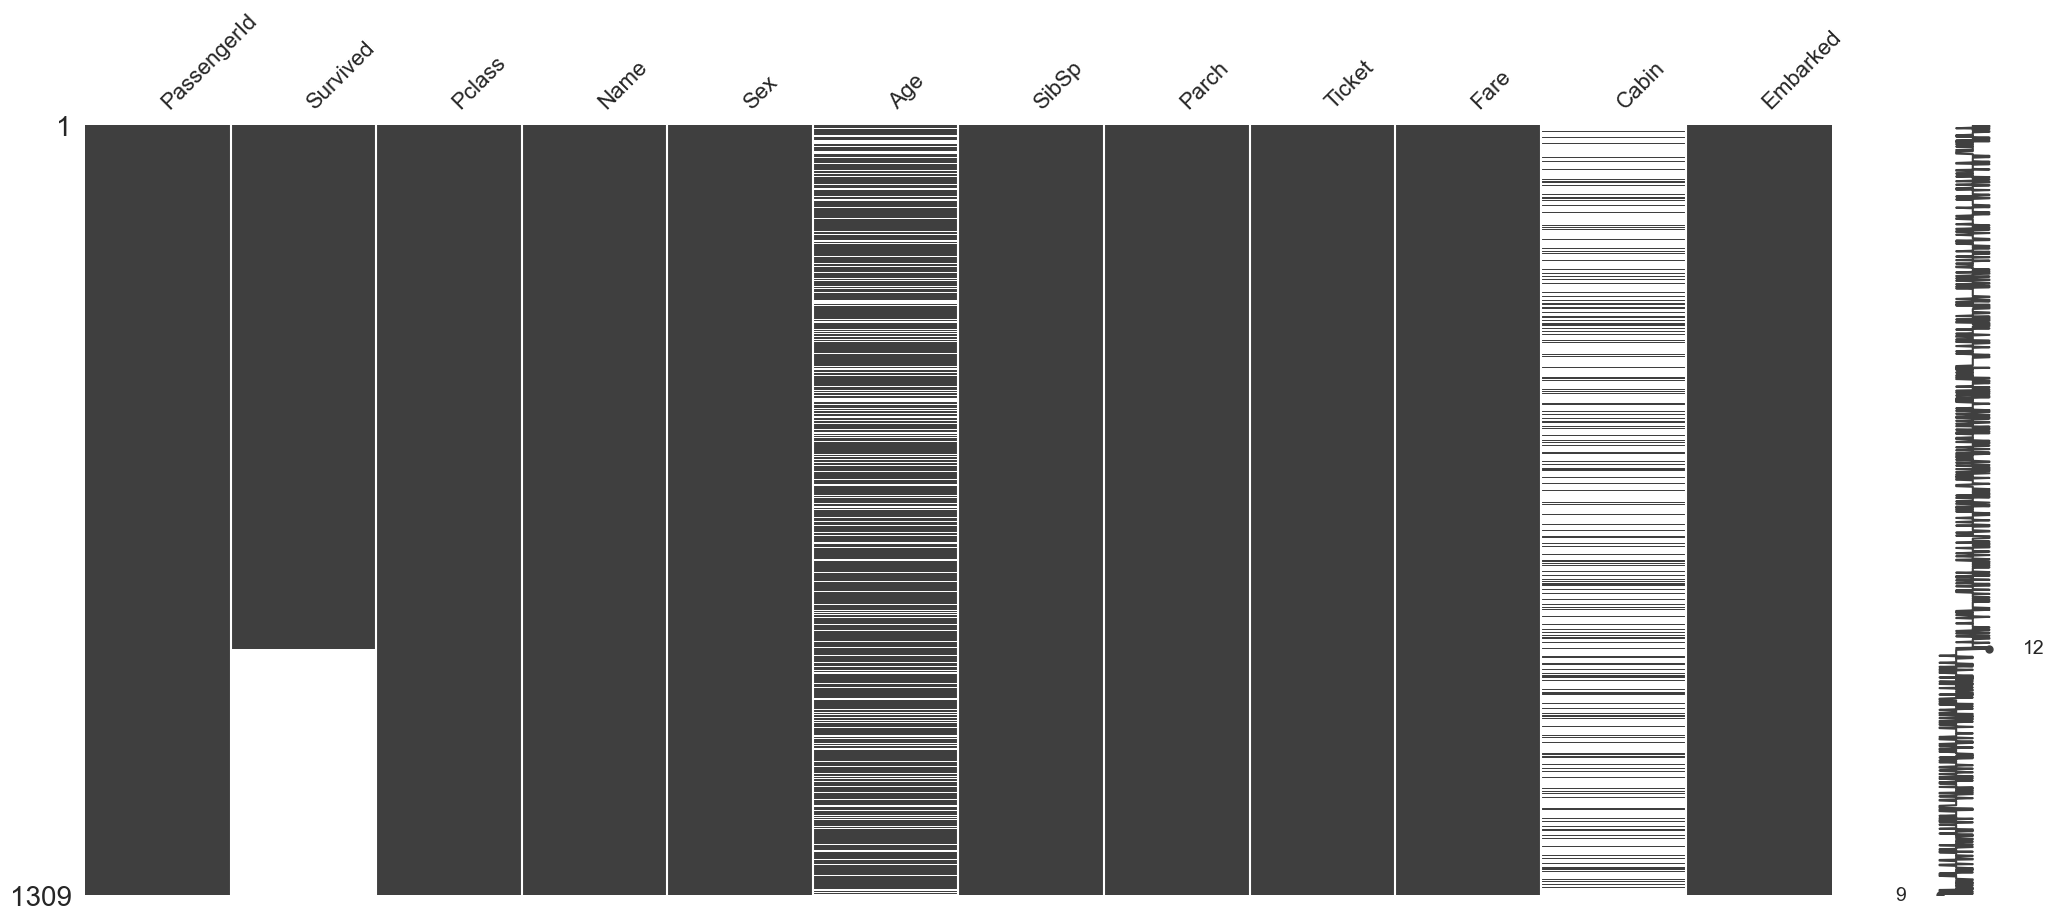

In [130]:
# 열별로 결측치 비율을 확인하여 전략을 세움
import missingno as msno

msno.matrix(df)
plt.show()

In [131]:
# (1) 데이터를 소수점 두 번째 자리까지 출력
pd.options.display.float_format = '{:.2f}'.format

# (2) 결측치 값의 합을 데이터의 개수로 나눠 비율로 출력
df.isnull().sum() / len(df) * 100

PassengerId    0.00
Survived      31.93
Pclass         0.00
Name           0.00
Sex            0.00
Age           20.09
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [132]:
# 데이터를 삭제할지 전략적인 의사결정
df[df["Age"].notnull()].groupby(["Sex"])["Age"].mean()
df[df["Age"].notnull()].groupby(["Pclass"])["Age"].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [133]:
# Age 결측치를 채우는 방법을 결정
# - 평균값으로 채움
df["Age"].fillna(df[df["Age"].notnull()].groupby(["Pclass"])["Age"].mean())

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
        ... 
1304     NaN
1305   39.00
1306   38.50
1307     NaN
1308     NaN
Name: Age, Length: 1309, dtype: float64

In [134]:
df.loc[61,"Embarked"] = "S"
df.loc[829,"Embarked"] = "S"

#### 2.6 범주형 데이터 처리 : 원핫인코딩
- 데이터 형태에 따라 처리 방법 결정
- df.info() 함수 : 열별로 데이터 타입을 확인(열별로 문자열 리스트 타입으로 정리)
##### 원핫(One-Hot)인코딩 : 
- 고유값에 해당하는 컬럼에만 1, 나머지 컬럼에는 0
- 0으로 이루어진 벡터에 단 한개의 1의 값으로 해당 데이터의 값을 구별
- 딥러닝, 데이터 마이닝, 자연어 처리 등 많은 분야에서 사용되고 있는 기법

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [136]:
# 데이터의 타입을 정리
object_columns = ["PassengerId", "Pclass", "Name", "Sex",
                  "Ticket", "Cabin", "Embarked"]
numeric_columns = ["Age", "SibSp", "Parch", "Fare"]

for col_name in object_columns:
    df[col_name] = df[col_name].astype(object)
    
for col_name in numeric_columns:
    df[col_name] = df[col_name].astype(float)
    
df["Parch"] = df["Parch"].astype(int)
df["SibSp"] = df["SibSp"].astype(int)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   object 
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   object 
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 122.8+ KB


In [138]:
# 데이터를 원핫인코딩으로 처리
def merge_and_get(ldf, rdf, on, how="inner", index=None):
    if index is True:
        return pd.merge(ldf,rdf, how=how, left_index=True,
                        right_index=True)
    else:
        return pd.merge(ldf,rdf, how=how, on=on)
    
one_hot_df = merge_and_get(
df, pd.get_dummies(df["Sex"], prefix="Sex"), on=None,
index=True)
one_hot_df = merge_and_get(
one_hot_df, pd.get_dummies(
df["Pclass"], prefix="Pclass"), on=None,
index=True)
one_hot_df = merge_and_get(
one_hot_df, pd.get_dummies(
df["Embarked"], prefix="Embarked"), on=None,
index=True)

one_hot_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0.00,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,False,True,False,False,True,False,False,True
1,2,1.00,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,True,False,True,False,False,True,False,False
2,3,1.00,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,True,False,False,False,True,False,False,True
3,4,1.00,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,True,False,True,False,False,False,False,True
4,5,0.00,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,False,True,False,False,True,False,False,True


#### 2.7 데이터 시각화 진행하기

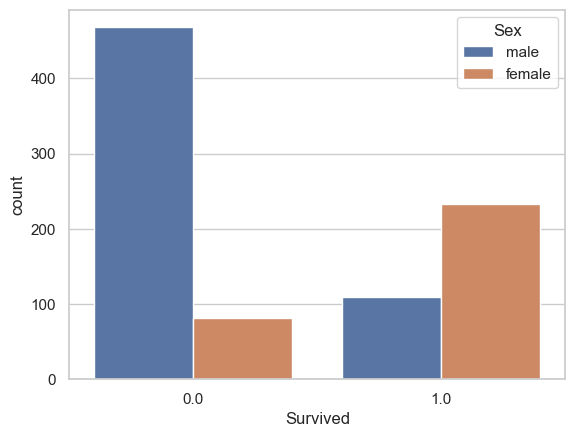

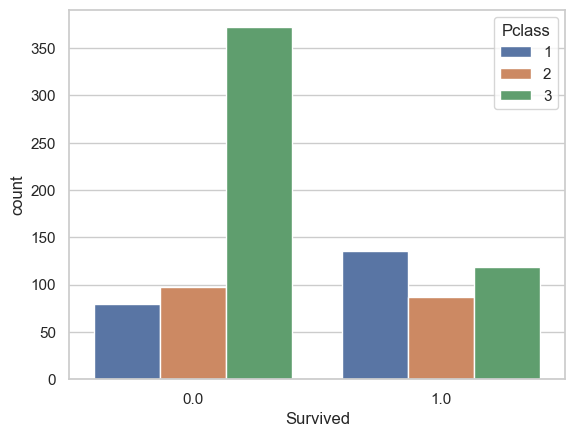

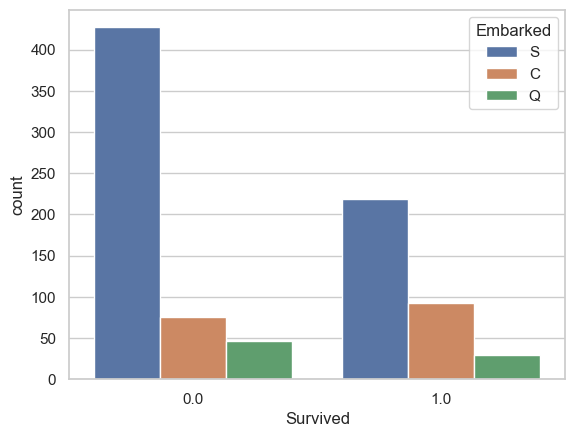

In [139]:
# 범주형 데이터에 따른 생존여부 분포 확인하기
temp_columns = ["Sex", "Pclass", "Embarked"]

for col_name in temp_columns:
    temp_df = pd.merge(one_hot_df[col_name], y_true, left_index=True, right_index=True)
    sns.countplot(x="Survived", hue=col_name, data=temp_df)
    plt.show()

#### 범주형 데이터 간 상관관계 분석

/Users/nedstar/miniforge3/envs/tf-env/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


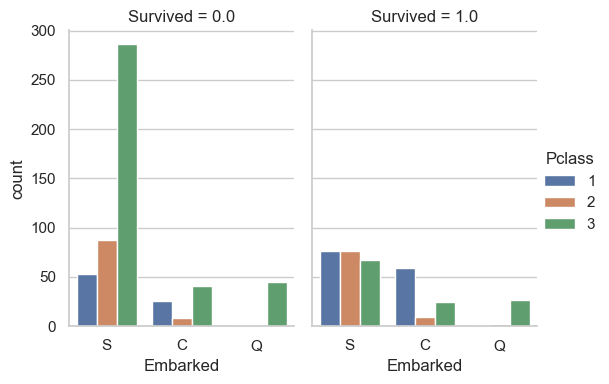

In [140]:
# 생존여부에 따른 승선항구와 티켓클래스 관계 확인하기
temp_df = pd.merge(one_hot_df[temp_columns],
                   y_true, left_index=True,
                   right_index=True)
g = sns.catplot(x="Embarked",
                hue="Pclass",
                col="Survived",
                data=temp_df,
                kind="count",
                height=4, aspect=.7)

/Users/nedstar/miniforge3/envs/tf-env/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


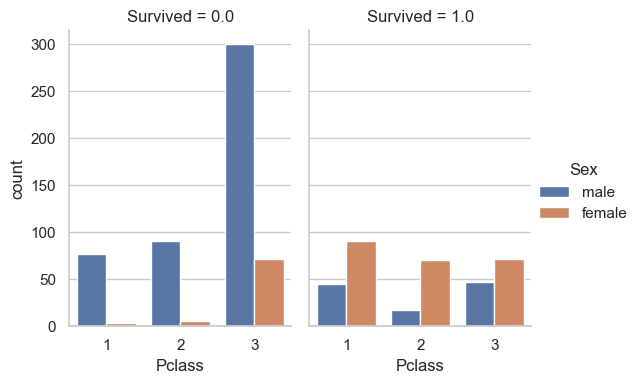

In [141]:
# 생존여부에 따른 티켓클래스와 성별 관계  확인하기
temp_df = pd.merge(one_hot_df[temp_columns],
                   y_true, left_index=True,
                   right_index=True)
g = sns.catplot(x="Pclass",
                hue="Sex", col="Survived",
                data=temp_df, kind="count",
                height=4, aspect=.7)

/Users/nedstar/miniforge3/envs/tf-env/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


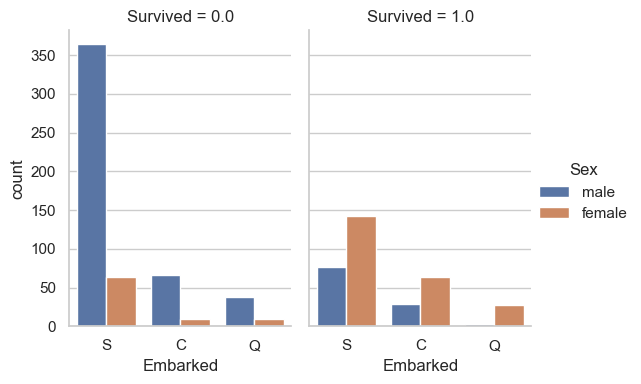

In [142]:
# 생존여부에 따른 승선항구와 성별 관계  확인하기
temp_df = pd.merge(one_hot_df[temp_columns],
                   y_true, left_index=True,
                   right_index=True)

g = sns.catplot(x="Embarked", hue="Sex",
                col="Survived",
                data=temp_df, kind="count",
                height=4, aspect=.7)

#### Heatmap 함수 : 상관계수(correlation) 데이터로 확인

In [143]:
temp_columns

['Sex', 'Pclass', 'Embarked']

In [144]:
# corr 함수로 상관계수 계산
# - 원핫인코딩 적용한 범주형 컬럼 + Sex 컬럼 -> 추출 
crosscheck_columns = [col_name for col_name in one_hot_df.columns.tolist()
if col_name.split("_")[0] in temp_columns and "_" in col_name ] + ["Sex"]
crosscheck_columns

# - 원핫인코딩 적용한 컬럼 + Sex + 생존여부 -> 병합
temp_df = pd.merge(one_hot_df[crosscheck_columns], y_true,
                   left_index=True, right_index=True)

# - 상관계수 시각화
corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")

ValueError: could not convert string to float: 'male'

----

THE END